# **SimBot-1 Notebook: Differential Drive Robots**
***

Differential Drive Robots (DDR) are based upon the concept that a robot with two opposing wheels and a simple DC motor for each wheel is all you need to control the simple movement of a robot in a 2D plane.<br>
Now that we have covered the basics of Python, we will advance to simple exercises involving a simulated DDR. <br>
In this course you will gain experience in coding for DDRs yet will not have to struggle with the challenging world of hardware and SSH connections to the RaspberryPi. The AlphaBot2 robot utilizing the RaspberryPi system is the robot for which we will be writing simulation code. 
#### **Figure 1:** Elevation view of the AlphaBot2 system<br>
![](SimRobot_images/AlphaBot2_Elevation_View.png)
#### **Figure 2:** Plan view of AlphaBot2 base 
![](SimRobot_images/AlphaBot2-Base-intro.jpg)
#### **Table 1:** Base description
![](SimRobot_images/AlphaBot2-Base-description.png)
AlphaBot2 robot building kit for Raspberry Pi 3 Model B. (n.d.). Retrieved from https://www.waveshare.com/alphabot2-pi.htm

The input used in this course is the Ultrasonic Ranging Sensor (URS) and the outputs are the two differential drive motors. As seen in Figure 2, the elements labeled "10" on the left-hand image are the differential drive motors.  <br>
A URS is effectively a sonar sensor that sends an ultrasonic signal forward and picks up any waves that bounce backward off an object in front of the sensor. Based upon the duration of time from when the signal is sent to when a signal is received, the robot can determine the distance from the robot to an object due to the average speed of the sound waves.<br>
Alphabot2 is a DDR: Two independent motors drive the left and right wheels and the differential speed between the two wheels control the speed and direction of the robot. As explained above, DDR is a system of two dual-directional DC motors mounted colinearly, mirrored about the forward-backward plane. Each motor can independently be turned either high or low (on or off). Does this provide every movement necessary to control the robot in a 2D plane?
<br>
<br>
Yes! So let's get to it!

# **SimBot-1 Notebook: Intro to Robot Classes and Methods**
The SimBot-1 defines classes and methods to control and move a simulated AlphaBot2 (described above). <br>
For this course we will learn what this SimBot-1 Notebook enables us to do with the AlphaBot2.  As mentioned in Intro Notebook 4, you can define your own classes and inside those classes define your own methods. By the end of this notebook you too will be writing code to drive the AlphaBot2. <br>
 Much of the code is originally sourced from http://enesbot.me/kinematic-model-of-a-differential-drive-robot.html 


The code in this notebook is more complex by nature of its objective. Some of the code is not required to understand the focus of this intro course - but it certainly wont hurt. There will be deliniation of expected understanding. In many cells, reading the doc string will often enable you to ascertain if it is necessary to understand that class, method etc. <br>
***
Not salient:

In [1]:
"""Header cell, contains modules and functions to make the whole notebook experience better"""
%matplotlib inline 
# plots graphs within the notebook

from IPython.display import display,Image, Latex
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
from IPython.display import clear_output

import time

from IPython.display import display,Image, Latex

from IPython.display import clear_output


import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc


import sympy as sym

    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font)

class PDF(object):
    
    def __init__(self, pdf, size=(200,200)):
        self.pdf = pdf
        self.size = size
    
    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)
    
    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    

## Objective
This notebook focuses on the control of a simulated differential drive robot for prescribed simple tasks. 

## Theoretical Background

The robot parameters are:
<ul>
    <li> Wheel radius: $r$. </li>
    <li> Length between wheels: $L$ </li>
    <li> Angular velocity of the left and right wheels: $\omega_L$, $\omega_R$, respectively.</li>
    <li> Angle from horizontal: $\alpha$.</li>
    <li> Position vector of the robot: $(x,y)$.</li>
    <li> Velocity vector of the robot: $V=(\dot{x},\dot{y})$.</li>
</ul>

Below is a diagram showing the nomenclature for the variables defined above: <br> 

<br>

#### **Figure 3: Differential Drive Nomenclature**<br>

![](SimRobot_images/DDR_terms.png)

<!-- <img src="attachment:(SimRobot_images/DDR_terms.png)" width="400"> -->

<br>
Hereafter $\dot{a}$ refers to the time derivative of variable $a$:
<br>
$$
\dot{a}=\frac{da}{dt}
$$
<br>
The velocities of the wheels are therefore defined as:
<br>
$$
V_L=\omega_Lr\text{ and }V_R=\omega_Rr
$$
<br>
The velocity of the robot, taken at the center of the wheels, is simply:
<br>
$$
\vec{V}=\frac{V_R+V_L}{2}(\cos(\alpha)\vec{e}_x+\sin(\alpha\vec{e}_y),
$$
<br>
yielding the following equations of motions:
<br>
$$
\dot{x}=r\frac{\omega_R+\omega_L}{2}\cos{\alpha}
$$
<br>
$$
\dot{y}=r\frac{\omega_R+\omega_L}{2}\sin{\alpha}
$$
<br>
and
<br>
$$
\dot{\alpha}=\frac{r}{L}(\omega_R-\omega_L)
$$
<br>
Numerically, these solutions of these equations requires their <b>discretization</b>. Remember that the derivative $\frac{da}{dt}$ of a variable $a=f(t)$ is the slope $s$ of the local tangent. Over a small enough time interval $\Delta t$, any continuous function $f$ can be approximated by a linear function based on the slope $a(t+\Delta t) =a(t)+s(t)\Delta t$. The derivative is then estimated as: <br>

$$
\frac{da}{dt}\approx\frac{\Delta a}{\Delta t}
$$
<br>

where $\Delta a=a(t+\Delta t$)-a(t). The discretized equations of motion may be recast as an integration of the trajectory of the robot:
<br>

$$
x(t+\Delta t) = x(t) +\Delta t\left(r\frac{\omega_R+\omega_L}{2}\cos{\alpha}\right),
$$
<br>

$$
y(t+\Delta t) = y(t) +\Delta t\left(r\frac{\omega_R+\omega_L}{2}\sin{\alpha}\right),
$$
<br>

$$
\alpha(t+\Delta t) = \alpha(t) +\Delta t\left(r\frac{\omega_R-\omega_L}{L}\right).
$$

As long as the <b>initial conditions</b> are prescribed at $t=0$, the motion of the robot is predictable providing that $\Delta t $ is not too large, as we shall see later. The present discretization is the simplest one, and also the most rudimentary. Even though the above equations carry fairly large numerical errors, no robot is perfect and these numerical errors will not be discussed here.

## Code description

The cell below includes two classes, named Robot and DDRobot. Robot defines the robot dimensions, position variables ($x,y,\alpha$), the time step $ \Delta t $, the left/right angular velocities and various functions necessary to integrate the robot motion.<br> DDRobot handles much of the movement of the robot through methods which call initialization objects defined in the Robot class. DDRobot is the main class while Robot is effectively created within class DDRobot as many of the methods from Robot class are called within DDRobot class. 
<br>
<br>
Read carefully through the following extensively commented cell to learn the Robot and DDRobot classes:

In [3]:
import matplotlib.pyplot as plt #enables plotting capabilities for the robot
                                #for this case this is the OUTPUT as the whole 
                                #robot is simulated through this notebook
import numpy as np #Numerical Python library as described in the Intro Python Notebook
import math #math module 
import scipy.constants as sc #shortcut for physical and mathematical constants 
                             #and units
import sympy as sym #SymPy is a Python library for symbolic mathematics

from math import sin, cos

class Robot(object):
    """Defines basic mobile robot properties. Defines __init__, step, print_xya, and 
    plot_robot methods. Is called in the main class of DDRobot."""
    def __init__(self):
        #initialization class. 
        self.pos_x  = 0.0 #placing bot at origin: (x,y) = (0,0)
        self.pos_y  = 0.0 
        self.angle  = 0.0 # IN RAD setting alpha = 0
        self.plot   = False #intializing no plot to show
        self._delta = 0.01 #
        self.step_plot = int(8) #plotting every 5 iterations
        self.mag_plot = 1.5 # arrow magnification

    # Movement
    def step(self):
        """ updates the x,y and alpha """
        self.deltax()
        self.deltay()
        self.deltaa()

    def move(self, seconds):
        """ Moves the robot for an 's' amount of seconds. Takes argument of seconds as type 
        int"""
        for i in range(int(seconds/self._delta)):
            self.step()
            if i % self.step_plot == 0 and self.plot: # plot path every 5 steps
                self.plot_xya() #plots a dot in the position of the robot 

    # Printing-and-plotting:
    def print_xya(self):
        """ prints the x,y position and angle """
        print ("x = " + str(self.pos_x) +" "+ "y = " + str(self.pos_y))
        print ("a = " + str(self.angle))
        
    def plot_robot(self):
        """ plots an arrow representation of the robot. """
        plt.arrow(self.pos_x, self.pos_y, 0.001
                  * cos(self.angle), 0.001 * sin(self.angle),
                  head_width=self.mag_plot*self.length, head_length=self.mag_plot*self.length,
                  fc='k', ec='k')

    def plot_xya(self):
        """ plots a dot in the position of the robot """
        plt.scatter(self.pos_x, self.pos_y, c='r', edgecolors='r')


class DDRobot(Robot):
    """Defines a differential drive robot. Is the main class. Moves the robot. 
    Class Robot is effectively created within class DDRobot as many of the 
    methods from Robot class are called within DDRobot class."""
    
    def __init__(self):
        """__init__ : Initialization class (for DDRobot class)"""
        Robot.__init__(self)
        self.radius = 0.1 #radius of bot wheel as defined in Fig 3
        self.length = 0.4 #length between bot wheels as defined in Fig 3
        self.rt_spd_left = 0.0 #initializing rotation speed, left wheel to 0
        self.rt_spd_right = 0.0 #initializing rotation speed, right wheel to 0

    def deltax(self):
        """ update x position depending on L and R angular speeds """
        self.pos_x += self._delta * (self.radius*0.5) \
        * (self.rt_spd_right + self.rt_spd_left)*cos(self.angle)

    def deltay(self):
        """ update y position depending on l and r angular speeds """
        self.pos_y += self._delta * (self.radius*0.5) \
        * (self.rt_spd_right + self.rt_spd_left)*sin(self.angle)

    def deltaa(self):
        """ update angle depending on l and r angular speeds """
        self.angle += self._delta * (self.radius/self.length) \
        * (self.rt_spd_right - self.rt_spd_left)

def D2R(a):
    """function to convert degrees to radians. Takes single argument of degrees."""
    return float(((math.pi)*float(a))/180.0)
def R2D(a):
    """Function to convert radians to degrees. Takes single argument of radians."""
    return float((180.0*float(a)/(math.pi)))



### Deriving time required to make a turn of a specified angle:
$\bar{\omega}$ (average angular velocity), is equal to: $\bar{\omega} = \frac{\Delta \Theta}{\Delta t}$ where $\Delta \Theta$ is change in angle, and $\Delta t$ is change in time. As we are specifying the $\Theta$ and and $\bar{\omega}$ of the turn, we can solve for the time required and then derive a relation for the exact time needed for the robot to achieve a rotation of a given angle around its center.<br>
$V = \frac{\omega}{t}$<br>
Solving for $t$:<br>
$t = \frac{\omega}{V}$ <br>
<br>

$t = \frac{\theta}{\frac{\pi}{2}{0.63}}$
<br>
<br>
![](SimRobot_images/angular_vel.png)

## DDR Movement Commands:

To efficiently repeatedly call a class, one should use object instantiation as explained in Notebook 4. The following cell screenshot shows the object instantiation of the DDRobot class under the object name mybot: <br>
(If another class had been instantiated to the object mybot, it would have been overridden by this new class object instantiation)

In [4]:
# object instantiation
mybot = DDRobot() # instantiating/creating an object instance of the DDRobot() class 
                    # enables methods to be passed to the Robot and DDRobot classes as objects

For simplicity, assume that all units are based on the metric system. Your new robot, <FONT FACE="courier" style="color:blue">mybot</FONT>, is by default located at $(x=0,y=0)$, its angle from the horizontal axis $x$ is $0$ and the wheel radius and length between wheel are $r=0.1$m and $L=0.4$m (see class <FONT FACE="courier" style="color:blue">DDRobot</FONT>). The default time step is $\Delta t=0.01$s. All these variables and more can be easily customized to your problem:

In [5]:
#object instantiation
mybot = DDRobot() 
mybot.pos_x = 0 #x
mybot.pos_y = 0 #y
mybot.angle = D2R(45) #alpha
mybot.length =0.4 #L
mybot.radius = 0.1 #r
mybot.rt_spd_left = 10 # omega_L
mybot.rt_spd_right = 10 # omega_R

#### Ex: Drive DDR in a straight line:
In simplest terms to move a DDR, you initialize each motor at a specified power and then pass the mybot.move(seconds) command. <br>
For a straight line you set each motor at equal power, and for a turn at unequal power. 
<br>
We will step through the commands required to execute a straight line in the following extensively commented cell. <br>

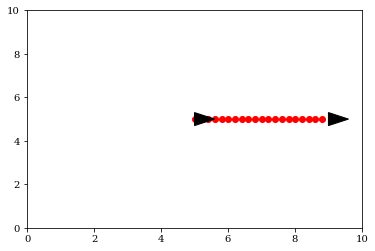

In [6]:
# object instantiation
mybot = DDRobot()             # creating an instance of DDRobot() enables methods to be passed to the 
                              #    Robot and DDRobot classes as objects
# initialization block as mentioned above
mybot.pos_x = 5               # calling pos_x method to set x initial position - in center of plot
mybot.pos_y = 5               # calling pos_y method to set y initial position - in center of plot
mybot.angle = 0               # initial starting direction: 0 radians from horizontal
mybot.plot = True             # turning on plot
mybot.mag_plot = 1.5          # coefficient of magnification of the arrow
mybot.step_plot = 20          # plotting robot's path as dots 
mybot.plot_robot()            # plotting the robot!

# movement block
mybot.rt_spd_left = 10        # setting rotational speed of left motor to 10
mybot.rt_spd_right = 10       # setting rotational speed of right motor to 10
mybot.move(4)                 # move for 4 seconds at set specifications

#resizing plot block
mybot.plot_robot()            # plotting robot's movement 
plt.xlim([0, 10])             # axis limits
plt.ylim([0, 10])
plt.rcParams["figure.figsize"] = (10,10) # forcing a square shape for plot
plt.show()                    # plotting full course of robots path 

You may change the size of the arrow and the spacing of the dots tracing the trajectory using the mag_plot and step_plot attributes:<br>
![](SimRobot_images/mag_plot,step_plot.png)

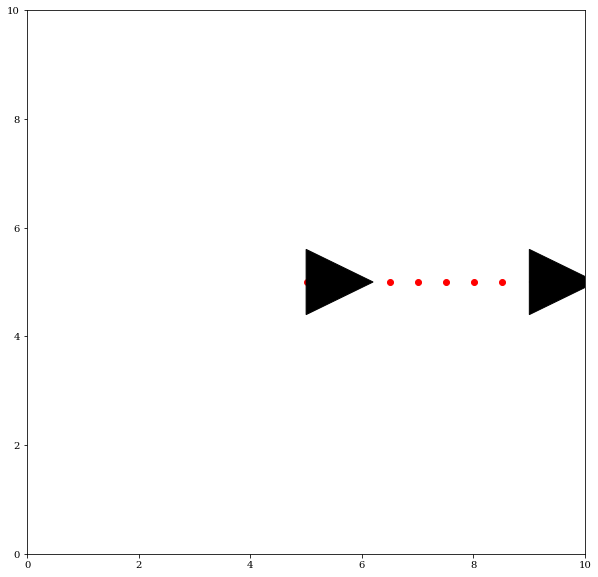

In [7]:
# object instantiation
mybot = DDRobot()             # creating an instance of DDRobot() enables methods to be passed to the Robot and DDRobot classes as objects
# initialization block as mentioned above
mybot.pos_x = 5               # calling pos_x method to set x initial position - in center of plot
mybot.pos_y = 5               # calling pos_y method to set y initial position - in center of plot
mybot.angle = 0               # initial starting direction: 0 radians from horizontal
mybot.plot = True             # turning on plot

mybot.mag_plot = 3          # coefficient of magnification of the arrow
mybot.step_plot = 50          # plotting robot's path as dots 

mybot.plot_robot()            # plotting robot's movement 
# movement block
mybot.rt_spd_left = 10        # setting rotational speed of left motor to 10
mybot.rt_spd_right = 10       # setting rotational speed of right motor to 10
mybot.move(4)                 # move for 4 seconds at set specifications
#resizing plot block
mybot.plot_robot()            # plotting robot's movement 
plt.xlim([0, 10])             # axis limits
plt.ylim([0, 10])
plt.rcParams["figure.figsize"] = (10,10) # forcing a square shape for plot
plt.show()                    # plotting full course of robots path 

### **Q1: Executing a turn:** Make a turn for 3 seconds using the above code as a framework:

In [8]:
#your code here:

### Now completing a full rotation:
We steped through the commands required to execute a straight line in the previous exercise and you just completed a turn for 3 seconds.<br>
As you likely discovered, to execute a turn with a DDR, the left and right angular velocities, $\omega_{L}$ and $\omega_{R}$ must be different. Therefore the only difference from a straight line in the code is to change one motor's power initialization setting to create an imballance in power applied to the bot.<br>
<br>
We will now derive the time, $t$ needed to turn the robot an angle $\alpha_o$ at given rotation speed $\omega_L$ and $\omega_R$ and robot dimensions $r$ and $L$. This equation starts by intergrating the robot angle equation above:

$$
\dot{\alpha}=\frac{d\alpha}{dt}=\frac{r}{L}(\omega_R-\omega_L)
$$

from $0$ to a time $t$ yields

$$
\int_0^t\frac{d\alpha}{dt}dt=\int_0^t\frac{r}{L}(\omega_R-\omega_L)dt
$$

Since the left hand side function is constant with respect to time, the result is simply:

$$
\alpha(t) - \alpha(0) =tr\frac{\omega_R-\omega_L}{L}
$$

Therefore the time to execute a rotation of angle $\alpha_o=\alpha(t) - \alpha(0)$ is

$$
t = \frac{\alpha_oL}{r(\omega_R-\omega_L)} \;\;\;\mathrm{Eq. Time\,of\,Turn}
$$
<br>
We will now implement the Time of Turn equation in the following cell: 

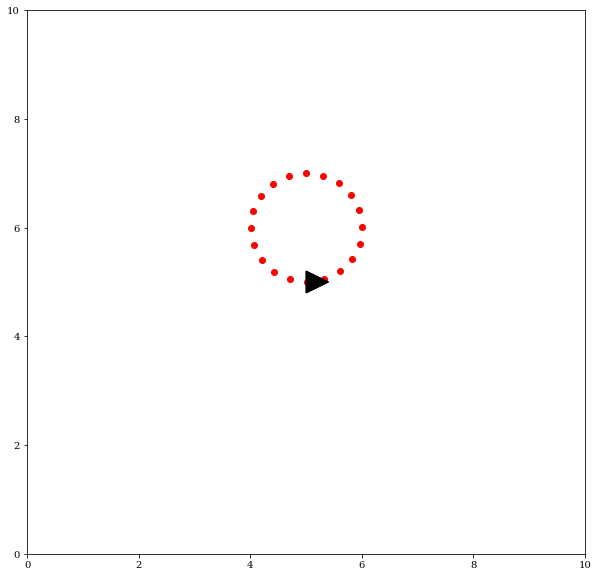

In [9]:
#object instantiation
mybot = DDRobot()               # enables methods to be passed to the Robot and DDRobot classes as objects
#initialization block
mybot.pos_x = 5              # calling pos_x method to set x initial position - in center of plot
mybot.pos_y = 5              # calling pos_y method to set y initial position - in center of plot
mybot.angle = float(D2R(0))  # initial starting direction: 0 radians
mybot.plot = True            # turning on plot
mybot.mag_plot = 1           # coefficient of magnification of the arrow
mybot.step_plot = 20
mybot.plot_robot()           # plotting the robot!

#movement block: 
a_t = D2R(360)
mybot.rt_spd_left = 4*math.pi 
mybot.rt_spd_right = 6*math.pi
# Time of Turn eq:
t = ((a_t - mybot.angle)*mybot.length)/(mybot.radius*(mybot.rt_spd_right - mybot.rt_spd_left))
mybot.move(t)                 # move for t seconds

#plotting block
mybot.plot_robot()            # plot robot's entire path
plt.xlim([0, 10])             # axis limits
plt.ylim([0, 10])
plt.rcParams["figure.figsize"] = (10,10) # forcing size as square
plt.show()

### **Q2: Square:** Now that you have completed a straight line and a turn, you have all the components to complete a square. Synthesize the two blocks of code to transcribe a square:

In [10]:
#your code here:

#### Ex: Repeated Code Block: Hexagon: 
Below is a demonstration on how to make a hexagon via two repeated code blocks:

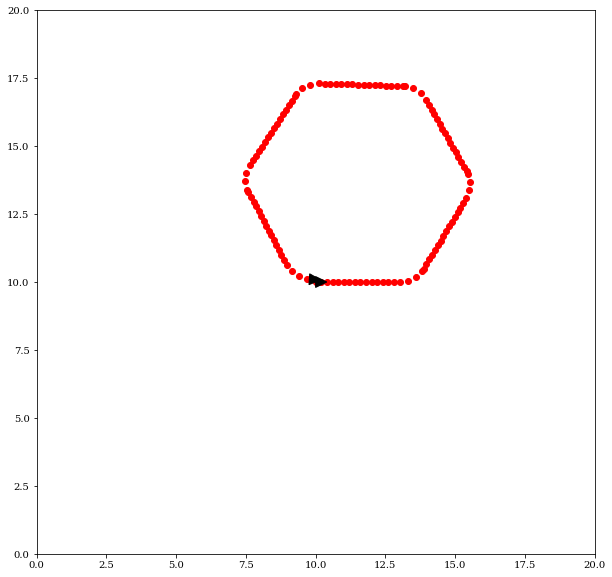

In [11]:
#object instantiation
mybot = DDRobot()             # enables methods to be passed to the Robot and DDRobot classes as objects

#initialization block
mybot.pos_x = 10               # calling pos_x method to set x initial position - in center of plot
mybot.pos_y = 10               # calling pos_y method to set y initial position - in center of plot
mybot.angle = D2R(0)         # initial starting direction: 0 rad
mybot.plot = True             # turning on plot
mybot.mag_plot = 1           # coefficient of magnification of the arrow
mybot.step_plot = 20
mybot.plot_robot()            # plotting the robot!

#movement block: 
    #1 side
#forward
mybot.rt_spd_left = 10
mybot.rt_spd_right = 10
mybot.move(3)
#turn
a_t = D2R(60)
mybot.rt_spd_left = 4*math.pi 
mybot.rt_spd_right = 6*math.pi
# Time of Turn eq:
t = ((a_t - 0)*mybot.length)/(mybot.radius*(mybot.rt_spd_right - mybot.rt_spd_left))
mybot.move(t)                 # move for t seconds

    #1 side
#forward
mybot.rt_spd_left = 10
mybot.rt_spd_right = 10
mybot.move(3)
#turn
mybot.rt_spd_left = 4*math.pi 
mybot.rt_spd_right = 6*math.pi
# Time of Turn eq:
t = ((a_t - 0)*mybot.length)/(mybot.radius*(mybot.rt_spd_right - mybot.rt_spd_left))
mybot.move(t)                 # move for t seconds

    #1 side
#forward
mybot.rt_spd_left = 10
mybot.rt_spd_right = 10
mybot.move(3)
#turn
mybot.rt_spd_left = 4*math.pi 
mybot.rt_spd_right = 6*math.pi
# Time of Turn eq:
t = ((a_t - 0)*mybot.length)/(mybot.radius*(mybot.rt_spd_right - mybot.rt_spd_left))
mybot.move(t)                 # move for t seconds

    #1 side
#forward
mybot.rt_spd_left = 10
mybot.rt_spd_right = 10
mybot.move(3)
#turn
mybot.rt_spd_left = 4*math.pi 
mybot.rt_spd_right = 6*math.pi
# Time of Turn eq:
t = ((a_t - 0)*mybot.length)/(mybot.radius*(mybot.rt_spd_right - mybot.rt_spd_left))
mybot.move(t)                 # move for t seconds

    #1 side
#forward
mybot.rt_spd_left = 10
mybot.rt_spd_right = 10
mybot.move(3)
#turn
mybot.rt_spd_left = 4*math.pi 
mybot.rt_spd_right = 6*math.pi
# Time of Turn eq:
t = ((a_t - 0)*mybot.length)/(mybot.radius*(mybot.rt_spd_right - mybot.rt_spd_left))
mybot.move(t)                 # move for t seconds

    #1 side
#forward
mybot.rt_spd_left = 10
mybot.rt_spd_right = 10
mybot.move(3)
#turn
mybot.rt_spd_left = 4*math.pi 
mybot.rt_spd_right = 6*math.pi
# Time of Turn eq:
t = ((a_t - 0)*mybot.length)/(mybot.radius*(mybot.rt_spd_right - mybot.rt_spd_left))
mybot.move(t)                 # move for t seconds

#plotting block
mybot.plot_robot()            # plot robot's entire path
plt.xlim([0, 20])             # axis limits
plt.ylim([0, 20])
plt.rcParams["figure.figsize"] = (20,20) # forcing size as square
plt.show()

## Coding Optimization:
While we can see in the previous example how differential drive robots work on the most elementary level, we can also see the glaring inefficiency of this process. <br>
For this example problem we will focus on two classic ways to increase the efficiency and decrease the number of lines of code required for the same operation: <br>
1. for loop the action commands
2. define methods for specific actions <br>

We will first focus on the for loop option:

### **Q3: For loop:** Instead of repeating the two blocks of code 6 times, write a for loop to transcribe a hexagon using the movement block:
If you need a refresher on for loops review Intro Notebook 3.

In [12]:
#your code here:

<br>

### **object.method(argument)** Optimization: 
Now that you have seen how a for loop can greatly reduce required lines of code for the same task, we will look at an even more powerful tool: **object.method(argument)**<br>
As you saw in the definition of the Robot and DDRobot classes, and their use in nearly every cell since, use of **object.method(argument)** enables a user to set attributes and use methods attached to an object while not requiring their redefinition for each cell. While this is one great use of object instantiation, we are about to discover yet another powerful use for classes. <br>
<br>
Look at the previous example: Repeated Code Block: Hexagon. The repetition in the movement block immediately jumps out: 
![](SimRobot_images/Movement_block.png)<br>
<br>
These two blocks are perfect candidates for truncation into two separate methods: <br>
"**turn_left()**", and "**forward()**". Of course a third method, "**turn_right()**" will also be defined as the opposite of "**turn_left()**". <br>

Classes and more specifically methods are an excellent application for reusing specific commands with changing arguments and even objects. We will now walk you through defining our own class and methods. <br>
**The objective of this class and it's methods are to** create callable **object.method(argument)** combinations that execute turns, and forward actions in one line of code. We will now create these methods as an addition to the DDRobot class:<br>
<br>
This class will be called "Turn" and have three methods: **object.turn_right(a_R)** , **object.turn_left(a_L)** , and **object.forward(f_time)** . <br>
This class and its corresponding methods can be seen in the screenshot below:<br>
<br>
![](SimRobot_images/Turn_class.png)
<br>
<br>
Take note how the input lines *a_R, a_L and f_time* for *turn_right, turn_left and forward* respectively have been commented out. This is done so input is not required each time the method is called i.e. in a for loop with n iterations. Therefore it is imperative to insert the following lines in the initialization block of your answer (before the method is called) to avoid causing errors (left turn angle variable shown):<br>
<br>
![](SimRobot_images/Turn_left.png)<br>
<br>
As these variables in the previous screenshot are defined in a cell and attached to an object instance mybot of the class Turn, they are called local variables. This means they won't change during iterations in the cell but will change from cell to cell i.e. they are not global variables. This prevents overwriting if you were using the same commands with a different object i.e. otherbot.a_L . If you wished to have a variable saved from cell to cell it is easy enough to assign that variable to be global as shown in the following screenshot: <br>
<br>
![](SimRobot_images/Global_var.png)<br>
<br>
<br>
### In the cell below, the Turn class has been created for the three turning methods: **turn_right()**, **turn_left()** and **forward()**. <br>These have been defined in the Turn class at the bottom of the cell. Take note of these additions and run the cell:
<br>
<br>

In [13]:
import matplotlib.pyplot as plt #enables plotting capabilities for the robot
                                #for this case this is the OUTPUT as the whole 
                                #robot is simulated through this notebook
import numpy as np #Numerical Python library as described in the Intro Python Notebook
import math #math module 
import scipy.constants as sc #shortcut for physical and mathematical constants 
                             #and units
import sympy as sym #SymPy is a Python library for symbolic mathematics

from math import sin, cos

class Robot(object):
    """Defines basic mobile robot properties. Defines __init__, step, print_xya, and 
    plot_robot methods. Is called in the main class of DDRobot."""
    def __init__(self):
        #initialization class. 
        self.pos_x  = 0.0 #placing bot at origin: (x,y) = (0,0)
        self.pos_y  = 0.0 
        self.angle  = 0.0 # IN RAD setting alpha = 0
        self.plot   = False #intializing no plot to show
        self._delta = 0.01 #
        self.step_plot = int(5) #plotting every 5 iterations
        self.mag_plot = 1.5 # arrow magnification

    # Movement
    def step(self):
        """ updates the x,y and alpha """
        self.deltax()
        self.deltay()
        self.deltaa()

    def move(self, seconds):
        """ Moves the robot for an 's' amount of seconds. Takes argument of seconds as type 
        int"""
        for i in range(int(seconds/self._delta)):
            self.step()
            if i % self.step_plot == 0 and self.plot: # plot path every 5 steps
                self.plot_xya() #plots a dot in the position of the robot 

    # Printing-and-plotting:
    def print_xya(self):
        """ prints the x,y position and angle """
        print ("x = " + str(self.pos_x) +" "+ "y = " + str(self.pos_y))
        print ("a = " + str(self.angle))
        
    def plot_robot(self):
        """ plots an arrow representation of the robot. """
        plt.arrow(self.pos_x, self.pos_y, 0.001
                  * cos(self.angle), 0.001 * sin(self.angle),
                  head_width=self.mag_plot*self.length, head_length=self.mag_plot*self.length,
                  fc='k', ec='k')

    def plot_xya(self):
        """ plots a dot in the position of the robot """
        plt.scatter(self.pos_x, self.pos_y, c='r', edgecolors='r')


class DDRobot(Robot):
    """Defines a differential drive robot. Helps move the robot. 
    Class Robot is effectively created within class DDRobot as many of the 
    methods from Robot class are called within DDRobot class."""
    
    def __init__(self):
        """__init__ : Initialization class (for DDRobot class)"""
        Robot.__init__(self)
        self.radius = 0.1 #radius of bot wheel as defined in Fig 3
        self.length = 0.4 #length between bot wheels as defined in Fig 3
        self.rt_spd_left = 0.0 #initializing rotation speed, left wheel to 0
        self.rt_spd_right = 0.0 #initializing rotation speed, right wheel to 0

    def deltax(self):
        """ update x position depending on L and R angular speeds """
        self.pos_x += self._delta * (self.radius*0.5) \
        * (self.rt_spd_right + self.rt_spd_left)*cos(self.angle)

    def deltay(self):
        """ update y position depending on l and r angular speeds """
        self.pos_y += self._delta * (self.radius*0.5) \
        * (self.rt_spd_right + self.rt_spd_left)*sin(self.angle)

    def deltaa(self):
        """ update angle depending on l and r angular speeds """
        self.angle += self._delta * (self.radius/self.length) \
        * (self.rt_spd_right - self.rt_spd_left)
        
        ### Turning Methods: 
        
class Turn(DDRobot):
    """Defines methods that move robot with fewer lines of code by defining specific actions into methods. 
    Calls DDRobot and its methods"""
    def __init__(self):
        """Initializes Turn class with DDRobot class object"""
        DDRobot.__init__(self)
        
    def turn_right(self,a_R):
        """Turns mybot a specified angle to the right. Args: R, desired angle of turn to Right """
            # takes input of degrees, converts to Radians
#         a_R = D2R(float(input("Enter the desired angle of rotation to the right (in degrees): "))) 
        self.rt_spd_left = 6*math.pi # initializing left rotational speed at 4*pi
        self.rt_spd_right = 4*math.pi # initializing left rotational speed at 6*pi
        t = ((a_R - 0)*mybot.length)/(mybot.radius*(mybot.rt_spd_left - mybot.rt_spd_right))
        # Time of Turn eq:
        self.move(t) # move for t seconds

    def turn_left(self,a_L):
        """Turns mybot a specified angle to the left. Args: L, desired angle of turn Left """
            # takes input of degrees, converts to Radians
#         a_L = D2R(float(input("Enter the desired angle of rotation to the left (in degrees): "))) 
        self.rt_spd_left = 4*math.pi # initializing left rotational speed at 4*pi
        self.rt_spd_right = 6*math.pi # initializing left rotational speed at 6*pi
        t = ((a_L - 0)*mybot.length)/(mybot.radius*(mybot.rt_spd_right - mybot.rt_spd_left))
        # Time of Turn eq:s
        self.move(t) # move for t seconds

    def forward(self,f_time):
        """Drives robot straight ahead for specified amount of time. Takes argument of f_time in seconds"""
#         f_time = int(input("Enter the desired time to move forward: "))
        self.rt_spd_left = 10
        self.rt_spd_right = 10
        self.move(f_time)


def D2R(a):
    """function to convert degrees to radians. Takes single argument of degrees."""
    return (math.pi*a)/180
def R2D(a):
    """Function to convert radians to degrees. Takes single argument of radians."""
    return 180*a/math.pi



### **Q4: Use turn and forward methods to complete a hexagon using a for loop:**
We have completed a for loop for a hexagon, and now defined methods for completing turns of user inputted angles and forward motion for user inputted time. <br>
Synthesize the code required to **take user input for number of desired sides, side length, then complete a hexagon using a for loop and plot its course, using mybot as the object, and the forward(), turn_right() or turn_left() methods.** You are welcome to use the initialization and plotting code blocks from previous exercises. 

In [14]:
#your code here:

### **Q5: n Sided Polygon *for* loop:** Write a script using a *for* loop and the turning methods that transcribes a polygon with n number of sides:

In [15]:
#your code here:

### **Q6: n Sided Polygon *while* loop:** Write a script using a *while* loop and the turning methods that transcribes a polygon with n number of sides, this time with **local variables**:
The body of the code can be reused from question 5 but **use local variales** if you haven't already. You must replace the for loop structure with a while loop and it's necessary commands. 

In [16]:
#your code here:

# Congratulations! 
You have completed SimBot-1 Notebook! You now know how to write a class, methods and attributes for a Differential Drive Robot. You are now ready to move onto SimRobot-2 Notebook: Sensor Input and Output for the AlphaBot2!